In [2]:
import ipyvuetify as v
import ipywidgets as widgets
import numpy as np
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
def convert_to_datetime(df):
    df['Meldedatum'] = pd.to_datetime(df['Meldedatum'], unit='ms')
    return df

def convert_to_date(df):
    df['Meldedatum'] = pd.to_datetime(df['Meldedatum']).dt.date
    return df

def remove_nicht_erhoben(df):
    df = df[df.Bundesland != '-nicht erhoben-']
    df = df[df.Landkreis != '-nicht erhoben-']
    return df

In [4]:
# Load data from RKI
response = requests.get("https://opendata.arcgis.com/datasets/dd4580c810204019a7b8eb3e0b329dd6_0.geojson")

In [5]:
json.loads(response.text)

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'properties': {'IdBundesland': 1,
    'Bundesland': 'Schleswig-Holstein',
    'Landkreis': 'SK Flensburg',
    'Altersgruppe': 'A15-A34',
    'Geschlecht': 'M',
    'AnzahlFall': 1,
    'AnzahlTodesfall': 0,
    'ObjectId': 163400,
    'Meldedatum': '2020-03-14T00:00:00.000Z',
    'IdLandkreis': '01001',
    'Datenstand': '22.03.2020 00:00'},
   'geometry': None},
  {'type': 'Feature',
   'properties': {'IdBundesland': 1,
    'Bundesland': 'Schleswig-Holstein',
    'Landkreis': 'SK Flensburg',
    'Altersgruppe': 'A15-A34',
    'Geschlecht': 'M',
    'AnzahlFall': 2,
    'AnzahlTodesfall': 0,
    'ObjectId': 163401,
    'Meldedatum': '2020-03-19T00:00:00.000Z',
    'IdLandkreis': '01001',
    'Datenstand': '22.03.2020 00:00'},
   'geometry': None},
  {'type': 'Feature',
   'properties': {'IdBundesland': 1,
    'Bundesland': 'Schleswig-Holstein',
    'Landkreis': 'SK Flensburg',
    'Altersgruppe': 'A15-A34',
    'Geschl

In [6]:
raw_data = pd.read_json(response.text)

In [7]:
raw_data = pd.DataFrame([x['properties'] for x in json.loads(response.text)['features']])

In [8]:
# raw_data = pd.DataFrame([x['attributes'] for x in json.loads(response.text)['features']])

In [9]:
raw_data.head()

,IdBundesland,Bundesland,Landkreis,Altersgruppe,Geschlecht,AnzahlFall,AnzahlTodesfall,ObjectId,Meldedatum,IdLandkreis,Datenstand
0,1,Schleswig-Holstein,SK Flensburg,A15-A34,M,1,0,163400,2020-03-14T00:00:00.000Z,01001,22.03.2020 00:00
1,1,Schleswig-Holstein,SK Flensburg,A15-A34,M,2,0,163401,2020-03-19T00:00:00.000Z,01001,22.03.2020 00:00
2,1,Schleswig-Holstein,SK Flensburg,A15-A34,M,1,0,163402,2020-03-21T00:00:00.000Z,01001,22.03.2020 00:00
3,1,Schleswig-Holstein,SK Flensburg,A15-A34,W,1,0,163403,2020-03-14T00:00:00.000Z,01001,22.03.2020 00:00
4,1,Schleswig-Holstein,SK Flensburg,A15-A34,W,2,0,163404,2020-03-18T00:00:00.000Z,01001,22.03.2020 00:00


In [10]:
raw_data['Altersgruppe'].drop_duplicates()

0        A15-A34
5        A35-A59
36       A60-A79
91     unbekannt
93       A00-A04
116      A05-A14
157         A80+
Name: Altersgruppe, dtype: object

In [11]:
raw_data.describe(include='all')

,IdBundesland,Bundesland,Landkreis,Altersgruppe,Geschlecht,AnzahlFall,AnzahlTodesfall,ObjectId,Meldedatum,IdLandkreis,Datenstand
count,8919.000000,8919,8919,8919,8919,8919.000000,8919.000000,8919.000000,8919,8919,8919
unique,NaN,16,405,7,3,NaN,NaN,NaN,35,405,1
top,NaN,Bayern,LK Heinsberg,A35-A59,M,NaN,NaN,NaN,2020-03-18T00:00:00.000Z,05370,22.03.2020 00:00
freq,NaN,1902,154,3883,4815,NaN,NaN,NaN,1160,154,8919
mean,7.646597,NaN,NaN,NaN,NaN,2.086557,0.006167,167859.000000,NaN,NaN,NaN
std,3.231032,NaN,NaN,NaN,NaN,2.576508,0.079709,2574.837859,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,1.000000,0.000000,163400.000000,NaN,NaN,NaN
25%,5.000000,NaN,NaN,NaN,NaN,1.000000,0.000000,165629.500000,NaN,NaN,NaN
50%,8.000000,NaN,NaN,NaN,NaN,1.000000,0.000000,167859.000000,NaN,NaN,NaN
75%,9.000000,NaN,NaN,NaN,NaN,2.000000,0.000000,170088.500000,NaN,NaN,NaN


In [12]:
cleaned_data = (raw_data
                .pipe(convert_to_date)
                .pipe(remove_nicht_erhoben)
               )

In [13]:
cleaned_data.head()

,IdBundesland,Bundesland,Landkreis,Altersgruppe,Geschlecht,AnzahlFall,AnzahlTodesfall,ObjectId,Meldedatum,IdLandkreis,Datenstand
0,1,Schleswig-Holstein,SK Flensburg,A15-A34,M,1,0,163400,2020-03-14,01001,22.03.2020 00:00
1,1,Schleswig-Holstein,SK Flensburg,A15-A34,M,2,0,163401,2020-03-19,01001,22.03.2020 00:00
2,1,Schleswig-Holstein,SK Flensburg,A15-A34,M,1,0,163402,2020-03-21,01001,22.03.2020 00:00
3,1,Schleswig-Holstein,SK Flensburg,A15-A34,W,1,0,163403,2020-03-14,01001,22.03.2020 00:00
4,1,Schleswig-Holstein,SK Flensburg,A15-A34,W,2,0,163404,2020-03-18,01001,22.03.2020 00:00


In [19]:
cleaned_data['Altersgruppe'].drop_duplicates()

0        A15-A34
5        A35-A59
36       A60-A79
91     unbekannt
93       A00-A04
116      A05-A14
157         A80+
Name: Altersgruppe, dtype: object

In [15]:
cleaned_data.describe(include='all')

,IdBundesland,Bundesland,Landkreis,Altersgruppe,Geschlecht,AnzahlFall,AnzahlTodesfall,ObjectId,Meldedatum,IdLandkreis,Datenstand
count,8919.000000,8919,8919,8919,8919,8919.000000,8919.000000,8919.000000,8919,8919,8919
unique,NaN,16,405,7,3,NaN,NaN,NaN,35,405,1
top,NaN,Bayern,LK Heinsberg,A35-A59,M,NaN,NaN,NaN,2020-03-18,05370,22.03.2020 00:00
freq,NaN,1902,154,3883,4815,NaN,NaN,NaN,1160,154,8919
mean,7.646597,NaN,NaN,NaN,NaN,2.086557,0.006167,167859.000000,NaN,NaN,NaN
std,3.231032,NaN,NaN,NaN,NaN,2.576508,0.079709,2574.837859,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,1.000000,0.000000,163400.000000,NaN,NaN,NaN
25%,5.000000,NaN,NaN,NaN,NaN,1.000000,0.000000,165629.500000,NaN,NaN,NaN
50%,8.000000,NaN,NaN,NaN,NaN,1.000000,0.000000,167859.000000,NaN,NaN,NaN
75%,9.000000,NaN,NaN,NaN,NaN,2.000000,0.000000,170088.500000,NaN,NaN,NaN


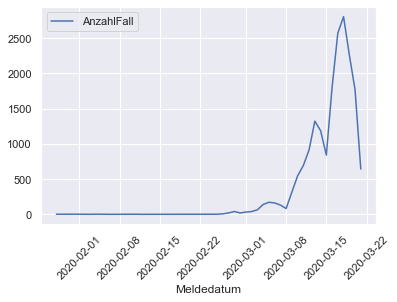

In [16]:
cleaned_data.groupby('Meldedatum').agg({'AnzahlFall': 'sum'}).plot(kind='line', rot=45)

In [17]:
# Nach Landkreis und Alter, Anzahl Fälle und Todesfälle
# Sterberate 
cleaned_data.groupby(['Meldedatum','Landkreis', 'Altersgruppe']).agg({'AnzahlFall': 'mean', 'AnzahlTodesfall': 'mean'})

AnzahlFall  AnzahlTodesfall
Meldedatum Landkreis           Altersgruppe                             
2020-01-28 LK Landsberg a.Lech A15-A34              1.0              0.0
           LK Starnberg        A35-A59              1.0              0.0
2020-01-29 LK Fürstenfeldbruck A15-A34              1.0              0.0
           SK München          A15-A34              1.0              0.0
2020-01-31 LK Fürstenfeldbruck A35-A59              1.0              0.0
...                                                 ...              ...
2020-03-21 SK Suhl             A35-A59              2.0              0.0
           SK Weiden i.d.OPf.  A15-A34              1.0              0.0
                               A35-A59              2.0              0.0
                               A60-A79              2.0              0.0
                               A80+                 1.0              0.0

[6490 rows x 2 columns]

In [18]:
sorted(cleaned_data['Meldedatum'].drop_duplicates().values)

[datetime.date(2020, 1, 28),
 datetime.date(2020, 1, 29),
 datetime.date(2020, 1, 31),
 datetime.date(2020, 2, 3),
 datetime.date(2020, 2, 4),
 datetime.date(2020, 2, 6),
 datetime.date(2020, 2, 7),
 datetime.date(2020, 2, 11),
 datetime.date(2020, 2, 12),
 datetime.date(2020, 2, 25),
 datetime.date(2020, 2, 26),
 datetime.date(2020, 2, 27),
 datetime.date(2020, 2, 28),
 datetime.date(2020, 2, 29),
 datetime.date(2020, 3, 1),
 datetime.date(2020, 3, 2),
 datetime.date(2020, 3, 3),
 datetime.date(2020, 3, 4),
 datetime.date(2020, 3, 5),
 datetime.date(2020, 3, 6),
 datetime.date(2020, 3, 7),
 datetime.date(2020, 3, 8),
 datetime.date(2020, 3, 9),
 datetime.date(2020, 3, 10),
 datetime.date(2020, 3, 11),
 datetime.date(2020, 3, 12),
 datetime.date(2020, 3, 13),
 datetime.date(2020, 3, 14),
 datetime.date(2020, 3, 15),
 datetime.date(2020, 3, 16),
 datetime.date(2020, 3, 17),
 datetime.date(2020, 3, 18),
 datetime.date(2020, 3, 19),
 datetime.date(2020, 3, 20),
 datetime.date(2020, 3, 21)